In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Enable inline plotting at lower left
%matplotlib inline

In [2]:
import pynrc
from pynrc import nrc_utils          # Variety of useful functions and classes

# Progress bar
from tqdm.auto import tqdm, trange

# Disable informational messages and only include warnings and higher
pynrc.setup_logging(level='WARN')

pyNRC log messages of level WARN and above will be shown.
pyNRC log outputs will be directed to the screen.


In [3]:
bp_k = pynrc.bp_2mass('k')
sp = pynrc.stellar_spectrum('A2V', 6.8, 'vegamag', bp_k)

In [4]:
filt = 'F300M'
image_mask = 'MASK335R'
pupil_mask = 'CIRCLYOT'

dist_sci = 110.63 # pc

# 'file'       : Path to model file or an HDUList.
# 'pixscale'   : Pixel scale for model image (arcsec/pixel).
# 'dist'       : Assumed model distance in parsecs.
# 'wavelength' : Wavelength of observation in microns.
# 'units'      : String of assumed flux units (ie., MJy/arcsec^2 or muJy/pixel)
# 'cen_star'   : True/False. Is a star already placed in the central pixel? 
disk_params = {
    'file' : 'HD141569_3rings-Model_NIRCam_F300M_2.fits',
    'pixscale' : 0.065,
    'dist' : dist_sci,
    'wavelength' : 3.0,
    'units' : 'Jy/pixel',
    'cen_star' : False,
}

nrc = pynrc.obs_hci(sp, distance=dist_sci, large_grid=True, use_ap_info=False,
                    filter=filt, image_mask=image_mask, pupil_mask=pupil_mask,
                    disk_params=disk_params)

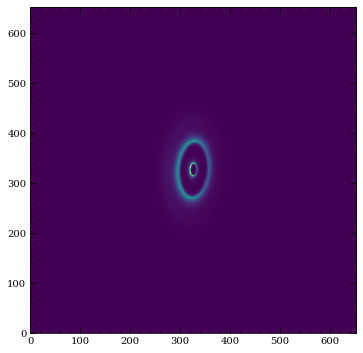

In [5]:
plt.imshow(nrc.disk_hdulist[0].data)

In [6]:
test = nrc.gen_disk_image(PA_offset=0, xyoff_asec=(0,0))
print(test.max(), test.sum())

Convolution:   0%|          | 0/1 [00:00<?, ?it/s]

Convolution:   0%|          | 0/1 [00:00<?, ?it/s]

0.7524755833666797 1639.3837351665122


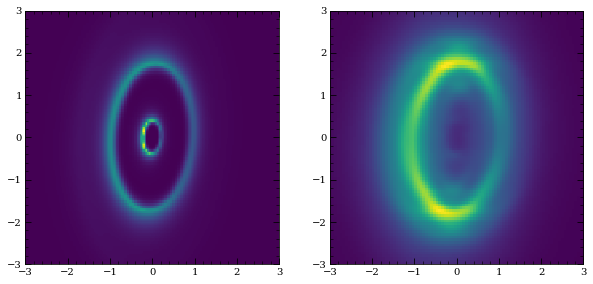

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

extent = np.array([-1,1,-1,1])*160*nrc.pixelscale

im = nrc.disk_hdulist[0].data
axes[0].imshow(im, extent=extent)
axes[1].imshow(test,extent=extent)

for ax in axes:
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])